# Quantum Fourier Transform (QFT)
The Quantum Fourier Transform (QFT) is a critical operation used in quantum computing protocols including period finding and phase estimation. For example, in the period finding protocol, the input state encodes a sequence with an underlying periodic structure, and, following the application of the QFT, the output encodes the period of the sequence
The quantum Fourier transform (QFT) is the quantum implementation of discrete Fourier transform over amplides of a wavefunction.

The discrete Fourier transform takes a vector of numbers $(x_0,..., x_{N-1})$ (often a digital sampling of a signal to be analyzed) and transforms it to a vector os numbers  $y_0,...,y_{N-1}$ (in the frequency domain) according to the formula
$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_{N}^{jk}$$, where $\omega_{N}^{jk} = e^{2\pi i\frac{jk}{N}}$.
 Periodic behavior in the time domain is more easily identified in the transformed frequency domain, which is why we do this. This is extremely useful because it allows us to analyze and manipulate data in the most convenient domain.

Similarly, the quantum Fourier tranform acts on a quantum state $\Ket{X} = \sum_{j=0}^{N-1}x_j\Ket{j}$ and maps it to the quantum state $\Ket{Y} = \sum{N-1}^{k=0}y_k\Ket{k}$ according to the formula
$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_{N}^{jk}$$, where $\omega_{N}^{jk} = e^{2\pi i\frac{jk}{N}}$
with $\omega_{N}^{jk}$ defined as above.Note that only the amplitudes of the state were effected by this transformation.

This can also be expressed as the map:
$$\Ket{j} \rightarrow \frac_{1}{\sqrt{N}}\sum_{k=0}^{N-1}\omega_{N}^{jk}\Ket{k}$$
Or the unitary matrix
$$ U_{QFT}= \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}\sum_{k=0}^{N-1}\omega_{N}^{jk}\Ket{k}\Bra{j} = \frac{1}{\sqrt{N}}
\begin{bmatrix}
1 & 1 & 1 & \ldots & 1 \\
1 & \omega & \omega^2 & \ldots & \omega^{N-1} \\
1 & \omega^2 & \omega^4 & \ldots & \omega^{2(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & \omega^{N-1} & \omega^{2(N-1)} & \ldots & \omega^{(N-1)(N-1)}
\end{bmatrix}
$$

## 2. Intuition
The Quantum Fourier transform (QFT) transforms between two bases, the computational (Z) basis, and the Fourier basis. The H-gate is the single-qubits qft, and it trnsforms between the Z-basis states $\Ket{0}$ and $\ket{1}$ to the X-basis states $\Ket{+}$ and $\Ket{-}$. In rhe same way, all multi-qubit simply the function that transforms between these bases.
$$\Ket{State in Computational Basis} \rightarrow^{QFT} \Ket{State in Fourier Basis} $$
$$QFT\Ket{x} = \Ket{\tilde{x}}$$

##2.1 counting in the Fourier basis:
In the computational basis, we store number in binary using the state
<img src="./resources/zbasis-counting.gif" style="width: 800px;"/>
Note the frequency with which the different qubits change; the leftmost qubit flips with every increment in the number, the next with every 2 increments, the third with every 4 increments, and so on. In the Fourier basis, we store numbers using different rotations around the Z-axis:
<img src="./resources/fourierbasis-counting.gif" style="width: 800px;"/>
The number we want to store dictates the angle at which each qubit is rotated around the Z-axis. In the state $\Ket{\tilde{0}}$, all qubits are in the state $\Ket{+}$. As seen in the example above, to encode the state $\Ket{\tilde{5}}$ on 4 qubits, we rotated the leftmost qubit by $\frac{5}{2^n} = \frac{5}{16}$ full turns ($\frac{5}{16} x 2\pi$ radians). The next qubit is turned double this ($\frac{10}{16} x 2\pi$ radians, or $10/15$ full turns), this angle is then doubled for the qubit after, and so on.
Again, note the frequency with which each qubit changes. The leftmost qubit (qubit 0) in this case has the lowest frequency, and the rightmost the highest.

<img src="./resources/qft_circuit.png" style="width: 800px;"/>

# 8. Qiskit Implementation
In Qiskit, the implementation of the `CROT` gate used in the discussion above is a controlled phase rotation gate. this gate is defined as
$$CP(\Theta)= \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i\Theta}
\end{bmatrix}$$
Hence, the mapping from $CROT_k$gate in the discussion above into the CP gate is foung from the equation
$$|theta = 2\pi/2^k = \pi/2^{k-1}$$

## 8.2 General QFT Function
We will now create a general circuit for the QFT in Qiskit. Creating large general circuits like this is really where Qiskit shines.

It is easier to build a circuit that implements the QFT with the qubits upside down, then swap them afterwards; we will start off by creating the function that rotates our qubits correctly. Letâ€™s start as we did with the 3 qubit example, by correctly rotating the most significant qubit (the qubit with the highest index):

In [21]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [28]:
def qft_rotations(circuit,n):
    if n == 0: #Exit function if circuit is empty
        return circuit
    n-=1 # Indexes start from 0
    circuit.h(n)
    for qubit in range(n):
        # For each less significant qubit, we need to do a
        # smaller-anged controlled rotation
        circuit.cp(pi/2**(n-qubit),qubit,n)


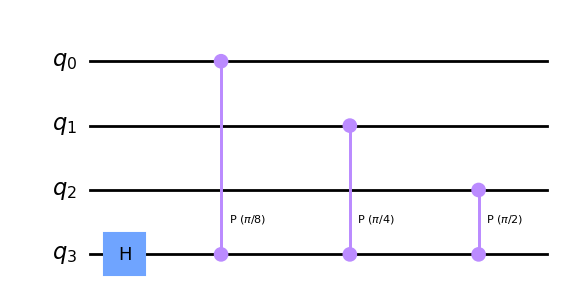

In [29]:
qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw('mpl')

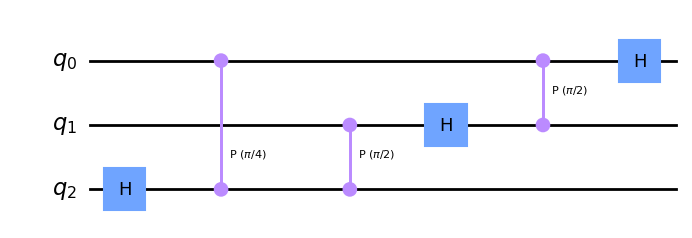

In [31]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), n, qubit)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

# Let's see how it looks:
qc = QuantumCircuit(3)
qft_rotations(qc,3)
qc.draw('mpl')

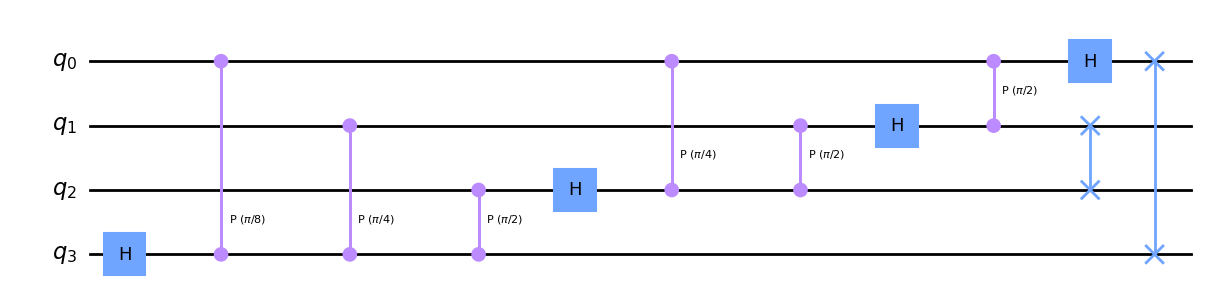

In [32]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Let's see how it looks:
qc = QuantumCircuit(4)
qft(qc,4)
qc.draw('mpl')

We now want to demonstrate this circuit works correctly. To do this we must first encode a number in the computational basis. We can see the number 5 in binary is 101:

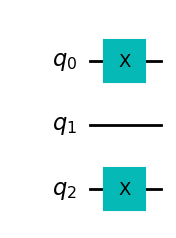

In [39]:
qc = QuantumCircuit(3)
qc.x(0)
qc.x(2)
qc.draw('mpl')

In [35]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
statevector.draw('latex')

<IPython.core.display.Latex object>

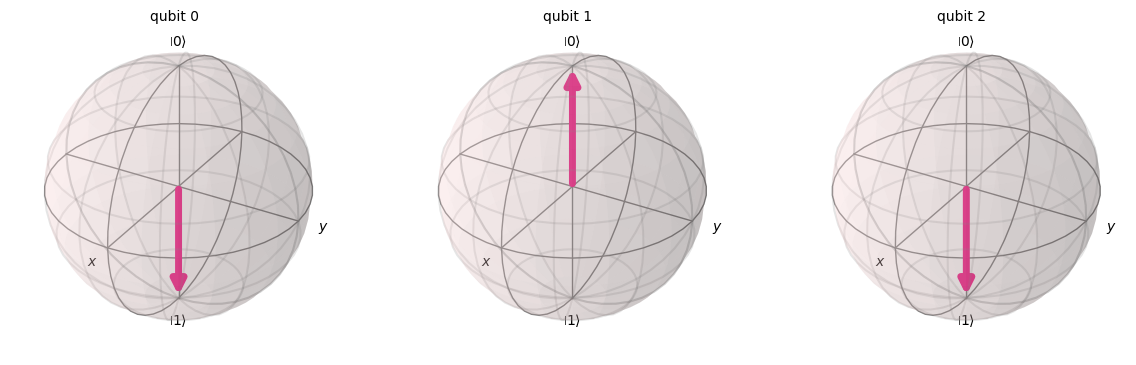

In [36]:
plot_bloch_multivector(statevector)

Resources:
* https://learn.qiskit.org/course/ch-algorithms/quantum-fourier-transform
* https://courses.xpro.mit.edu/learn/course/course-v1

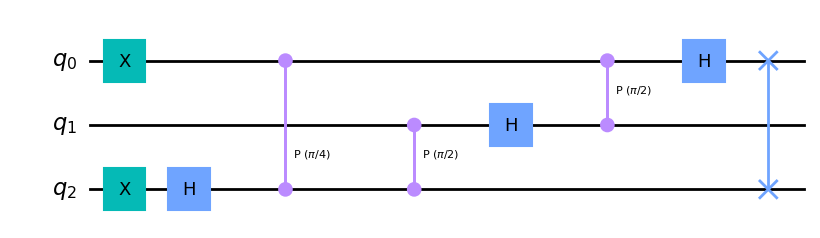

In [40]:
qft(qc,3)
qc.draw('mpl')

In [41]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
statevector.draw('latex')

<IPython.core.display.Latex object>

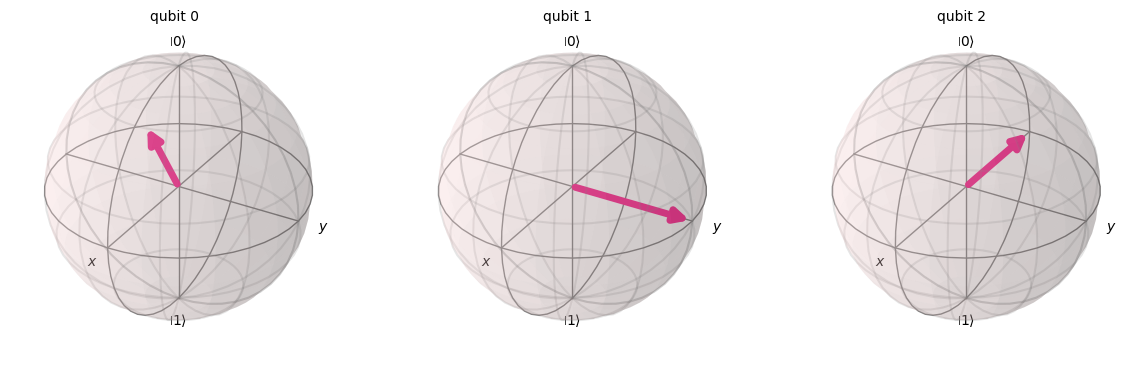

In [42]:
plot_bloch_multivector(statevector)